## 1 Business Understanding

Bike sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental and return back has become automatic. Through these systems, users are able to easily rent a bike from a particular position and return back to another position. Currently, there are about over 500 bike-sharing programs around the world which are composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues. <br><br>
Apart from interesting real-world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns the bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of
the important events in the city could be detected via monitoring these data. 
This dataset contains the hourly and daily count of rental bikes between 2011 and 2012 in the Capital bikeshare system in Washington, DC with the corresponding weather and seasonal information. 

### 1.1 Objective 

Identify key finding(s) from the data that would help drive more revenue to the business and share this finding with an executive team audience in a way that you see fit.

### 1.2 Methodology

To tackle this business analysis it will be used the CRISP-DM methodology. <br><br>


## 2 Data Understanding
### 2.1 Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
pd.set_option("display.max.columns", None) # Allows visualization of all columns in the dataframe
pd.set_option("display.precision", 3) # Sets decimal precision to 3 places

### 2.2 Collect Data

In [5]:
df=pd.read_csv('Case Study - BI Analyst Wunderflats (Dataset).csv')

### 2.3 Describe and Explore Data

In [6]:
df.shape # Check shape

(17379, 17)

In [7]:
df.describe() # Describe quick statistical facts about this dataframe

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000
mean,8690.000,2.502,0.503,6.538,11.547,0.029,3.004,0.683,1.425,0.497,0.476,0.627,0.190,35.676,153.787,189.463
std,5017.029,1.107,0.500,3.439,6.914,0.167,2.006,0.465,0.639,0.193,0.172,0.193,0.122,49.305,151.357,181.388
min,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.020,0.000,0.000,0.000,0.000,0.000,1.000
25%,4345.500,2.000,0.000,4.000,6.000,0.000,1.000,0.000,1.000,0.340,0.333,0.480,0.104,4.000,34.000,40.000
50%,8690.000,3.000,1.000,7.000,12.000,0.000,3.000,1.000,1.000,0.500,0.485,0.630,0.194,17.000,115.000,142.000
75%,13034.500,3.000,1.000,10.000,18.000,0.000,5.000,1.000,2.000,0.660,0.621,0.780,0.254,48.000,220.000,281.000
max,17379.000,4.000,1.000,12.000,23.000,1.000,6.000,1.000,4.000,1.000,1.000,1.000,0.851,367.000,886.000,977.000


**Takeaways:**  
- temp, atemp, hum are normalized columns.
- cannot determine windspeed scale (it's not knots, km/h, m/s, mph due to it's low values for earth atmosphere). Most likely is a subset of a greater normalized set.
- 4 categories of weathersit

In [8]:
df.describe(include=object) # Describe non numeric columns statistics

,dteday
count,17379
unique,731
top,2011-09-25
freq,24


In [9]:
df.head(30) # Dataframe's head glimpse 

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.288,0.81,0.000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.273,0.80,0.000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.273,0.80,0.000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.288,0.75,0.000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.288,0.75,0.000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.258,0.75,0.090,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.273,0.80,0.000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.258,0.86,0.000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.288,0.75,0.000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.348,0.76,0.000,8,6,14


In [10]:
df.tail(30) # Dataframe's tail glimpse 

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17349,17350,2012-12-30,1,1,12,18,0,0,0,2,0.24,0.212,0.44,0.298,12,113,125
17350,17351,2012-12-30,1,1,12,19,0,0,0,1,0.34,0.364,0.61,0.000,16,86,102
17351,17352,2012-12-30,1,1,12,20,0,0,0,1,0.22,0.197,0.47,0.328,9,63,72
17352,17353,2012-12-30,1,1,12,21,0,0,0,1,0.20,0.212,0.51,0.164,5,42,47
17353,17354,2012-12-30,1,1,12,22,0,0,0,1,0.20,0.197,0.55,0.194,6,30,36
17354,17355,2012-12-30,1,1,12,23,0,0,0,1,0.20,0.197,0.51,0.224,10,39,49
17355,17356,2012-12-31,1,1,12,0,0,1,1,1,0.18,0.182,0.55,0.194,4,30,34
17356,17357,2012-12-31,1,1,12,1,0,1,1,1,0.18,0.182,0.55,0.194,6,13,19
17357,17358,2012-12-31,1,1,12,2,0,1,1,1,0.16,0.167,0.59,0.164,3,8,11
17358,17359,2012-12-31,1,1,12,3,0,1,1,1,0.16,0.182,0.59,0.104,0,1,1


**Takeaways**: the unique key of this dataframe is the combination of 'dteday'+'hr' columns

In [11]:
df.info() # Verify data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Takeaways**: 'dteday' has the wrong datetype

(array([4821., 2151., 1917., 1788., 1493., 1166.,  931.,  729.,  542.,
         445.,  371.,  292.,  203.,  166.,  119.,   69.,   80.,   59.,
          25.,   12.]),
 array([  1. ,  49.8,  98.6, 147.4, 196.2, 245. , 293.8, 342.6, 391.4,
        440.2, 489. , 537.8, 586.6, 635.4, 684.2, 733. , 781.8, 830.6,
        879.4, 928.2, 977. ]),
 <BarContainer object of 20 artists>)

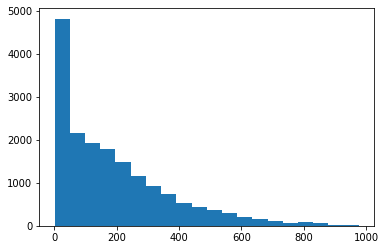

In [12]:
plt.hist(df.cnt, bins=20) # Quick histogram of 'cnt' column

**Takeaways:** reciprocal curve

<AxesSubplot:>

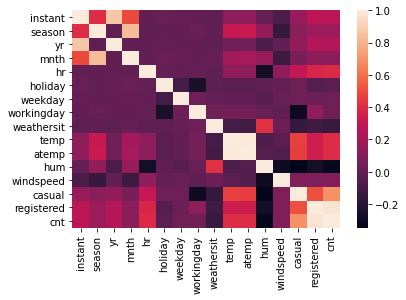

In [13]:
sns.heatmap(df.corr())

**Takeaways:** temp, atemp and hr have a positive moderate correlation with cnt.

### 2.4 Verify Data Quality

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Takeaways**: no missing values in any column

## 3 Data Preparation

### 3.1 Select relevant data & clean

In [47]:
def normalize_col(df,col):
    '''
    Normalize a column from a dataframe.

    Input:
        df - Pandas dataframe with desired column to be normalized.
        col - Column name (string).
    
    Output:
        normalized - normalized column.
    '''
    x=df[col]
    xmax=x.max()
    xmin=x.min()

    normalized=(xmax-x)/(xmax-xmin)

    return normalized

def create_daytype_column(df):
    '''
    Create costumn daytype column, which can assume one of four values:
    
        0 - Holiday False and Workingday False. 
        1 - Holiday True and Workingday False.
        2 - Holiday False and Workingday True.
        3 - Holiday True and Workingday True.

    Input:
        df - Pandas dataframe with holiday and workingday binary columns.
    
    Output: 
        None.
        
    ''' 
    df['daytype'] = df['holiday']+2*df['workingday']

In [48]:
df_clean = df.drop(columns='instant') # Drop unnecessary columns for analysis
df_clean['dteday'] = pd.to_datetime(df_clean['dteday']+' '+df_clean.hr.astype(str)+':00:00') # Adjust 'dteday' to correct data type
df_clean.insert(4,'day',df_clean.dteday.dt.day) # Create 'day' column in position 4
df_clean.rename(columns={'dteday':'datetime'}, inplace=True) # Rename column 'dteday' to 'datetime'
df_clean.set_index('datetime', inplace=True) # Set 'datetime' as index for faster processing
df_clean.windspeed=normalize_col(df_clean,'windspeed') # Normalize windspeed column
create_daytype_column(df_clean) # Creates 'daytype' column
df_clean

,season,yr,mnth,day,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,daytype
datetime,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,1,1,0,0,6,0,1,0.24,0.288,0.81,1.000,3,13,16,0
2011-01-01 01:00:00,1,0,1,1,1,0,6,0,1,0.22,0.273,0.80,1.000,8,32,40,0
2011-01-01 02:00:00,1,0,1,1,2,0,6,0,1,0.22,0.273,0.80,1.000,5,27,32,0
2011-01-01 03:00:00,1,0,1,1,3,0,6,0,1,0.24,0.288,0.75,1.000,3,10,13,0
2011-01-01 04:00:00,1,0,1,1,4,0,6,0,1,0.24,0.288,0.75,1.000,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,1,12,31,19,0,1,1,2,0.26,0.258,0.60,0.807,11,108,119,2
2012-12-31 20:00:00,1,1,12,31,20,0,1,1,2,0.26,0.258,0.60,0.807,8,81,89,2
2012-12-31 21:00:00,1,1,12,31,21,0,1,1,1,0.26,0.258,0.60,0.807,7,83,90,2


In [68]:
h0w0 = df_clean[df_clean['daytype']==0].index # holiday FALSE and workingday FALSE
h1w0 = df_clean[df_clean['daytype']==1].index # holiday TRUE and workingday FALSE 
h0w1 = df_clean[df_clean['daytype']==2].index # holiday FALSE and workingday TRUE
h1w1 = df_clean[df_clean['daytype']==3].index # holiday TRUE and workingday TRUE

h1w1 # Checking data integrity

DatetimeIndex([], dtype='datetime64[ns]', name='datetime', freq=None)

No h1w1 dates. This means that there is no day in the data that is holiday and workingday at the same time, which is the desired result.

## 4 Modeling

In this section it will be explored possible business relevant information through graphical analysis.

First, let's considerate what graphics could be interesting for such analysis.

1. cnt timeline (with registered and casual tracer + holiday/workingday points + climate subplots) - checks how the business is developing along time and shows possible holiday, workingday effects
2. month+weekday vs hour (heatmap) by 
<br>2.1 cnt average - checks what are the best months+weekday/hour combinations per cnt average regardless of year
<br>2.2 cnt/year average - checks what are the best months+weekday/hour combinations per cnt average according of year
3. cnt by year (bar)
4. avg cnt by weekday (bar)
5. avg cnt by weathersit (bar)

<AxesSubplot:xlabel='datetime'>

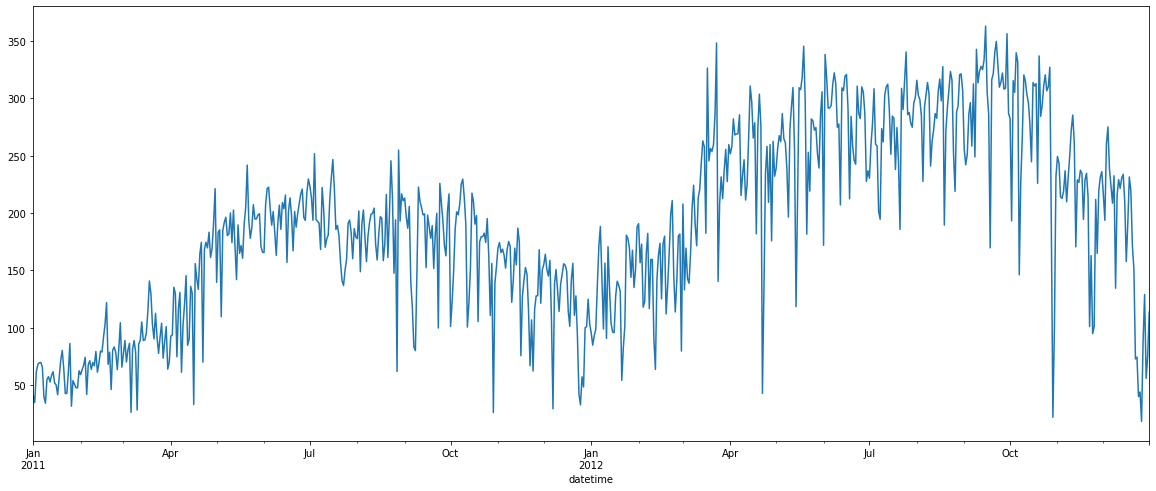

In [38]:
df_clean.resample('D').mean()['cnt'].plot(figsize=(20,8))

Visualization of the data is not great even calculating the average 'cnt' of the day. Still too much variability to see clear trends. Therefore lets use rolling average.

<AxesSubplot:xlabel='datetime'>

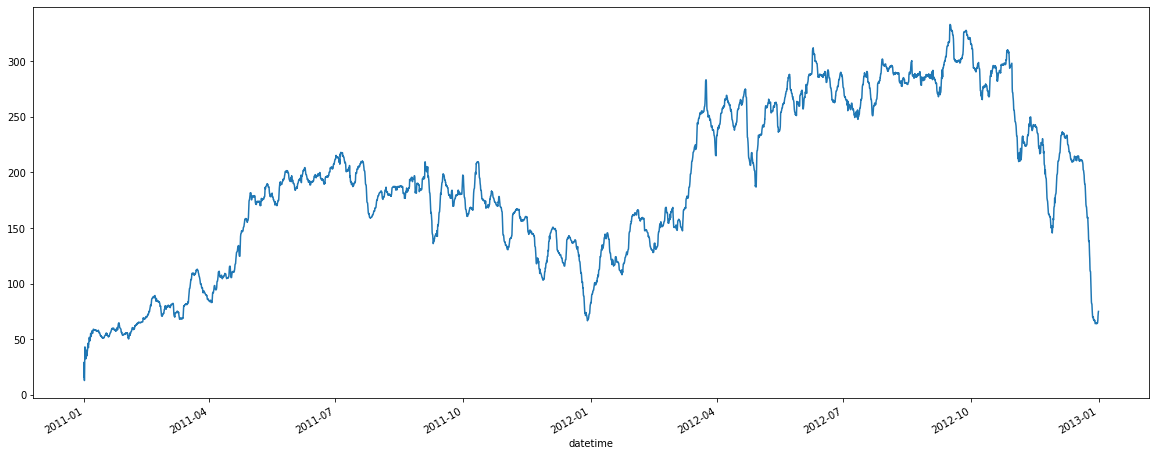

In [42]:
df_clean['cnt'].rolling('7d').mean().plot(figsize=(20,8))

<AxesSubplot:xlabel='datetime'>

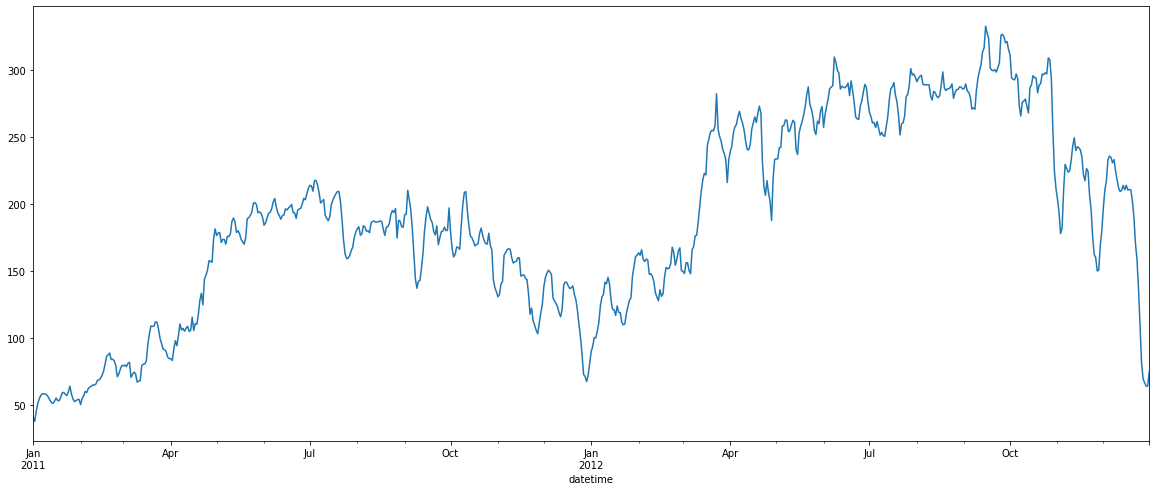

In [69]:
df_roll_7d=df_clean.resample('D').mean().rolling('7d').mean()
df_roll_7d['cnt'].plot(figsize=(20,8))

In [61]:
df_clean.loc[h0w0]

,season,yr,mnth,day,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,daytype
datetime,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,1,1,0,0,6,0,1,0.24,0.288,0.81,1.000,3,13,16,0
2011-01-01 01:00:00,1,0,1,1,1,0,6,0,1,0.22,0.273,0.80,1.000,8,32,40,0
2011-01-01 02:00:00,1,0,1,1,2,0,6,0,1,0.22,0.273,0.80,1.000,5,27,32,0
2011-01-01 03:00:00,1,0,1,1,3,0,6,0,1,0.24,0.288,0.75,1.000,3,10,13,0
2011-01-01 04:00:00,1,0,1,1,4,0,6,0,1,0.24,0.288,0.75,1.000,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-30 19:00:00,1,1,12,30,19,0,0,0,1,0.34,0.364,0.61,1.000,16,86,102,0
2012-12-30 20:00:00,1,1,12,30,20,0,0,0,1,0.22,0.197,0.47,0.614,9,63,72,0
2012-12-30 21:00:00,1,1,12,30,21,0,0,0,1,0.20,0.212,0.51,0.807,5,42,47,0


## 5 Evaluation